## 0.1. ANÁLISE DE TAGS RECEBIDAS

O objetivo desse notebook é ler as tags, separá-las em grupos (ex tags de pressão, de temperatura, etc) e, por fim, analisá-las. Também verificamos as tags faltantes.

Análises feitas:
* Tags faltantes
* Estatísticas: média, máximo, mínimo e percentual de NaN
* Anos das tags
* Qualidade: quantidade de dados bons e ruins

Requisitos para rodar o notebook:
* É necessário ter as tags baixadas dentro de '1_dados_raw'/'sensores'/'out'

In [1]:
import pandas as pd
import os
import time
import missingno as msno
import numpy as np
# bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

# importando funções de 'read_tags.py'
%run ..\..\..\funcoes_base_global\read_tags.py

### 1. Definindo funções auxiliadoras

In [2]:
def path(name):
    path = os.path.join('..','..','1_dados_raw','sensores','out', name)
    return(path)

def path_2(name):
    path = os.path.join('..','..','1_dados_raw','excel', name)
    return(path)

def path_3(name):
    path = os.path.join('out', name)
    return(path)

In [3]:
def estatisticas(df):
    "Cria dataframe cujas colunas são média, máximo, mínimo e % de NaN por tag"
    media = df[df.columns[0:]].mean()
    maximo = df[df.columns[0:]].max()
    minimo = df[df.columns[0:]].min()
    percentNan = df[df.columns[0:]].isna().sum() / df.shape[0] * 100
    
    stats = pd.concat([media,minimo,maximo,percentNan],axis=1)
    stats.columns = ['mean','min','max','percentNan']
    return stats

In [4]:
def qualidade(data):
    "Conta quantidade de dados classificados como bons e ruins"
    for tag in data.columns[data.columns.str.contains('_quality')]:
        total = data[tag].count()
        good = data[tag][data[tag] == 'Good'].count()
        bad = data[tag][data[tag] == 'Bad'].count()
        print(tag)
        print('Qtd good: %d       Qtd bad: %d       Good Percent: %.2f \n'%(good, bad, (good/total)*100))

### 2. Setando listas de tags

In [6]:
# Armazena o nome dos todas as tags baixadas
tags_baixadas = os.listdir(path(''))
tags_baixadas = pd.Series(tags_baixadas)
tags_baixadas = tags_baixadas[tags_baixadas.str.contains('.csv.gz')]
tags_baixadas = tags_baixadas.str.split('.csv.gz', expand = True)
tags_baixadas = tags_baixadas.drop(1, axis = 1).reset_index(drop = True)
tags_baixadas = tags_baixadas.rename(columns = {0 : 'Tags'})
tags_baixadas = tags_baixadas['Tags'].str.split('_', expand = True)[0]
#tags_baixadas = tags_baixadas[0].tolist()

In [7]:
# Armazena as tags solicitadas para extração
name = 'TAGS.xlsx'
tags_solicitadas = pd.read_excel(path_2(name))
tags_solicitadas['Tags'] = tags_solicitadas['Tags'].str.strip()
#tags_solicitadas = tags_solicitadas['Tags'].tolist()

In [8]:
tags_baixadas = list(tags_baixadas)

In [9]:
# Verificando tags faltantes
tags_faltantes = [x for x in tags_solicitadas['Tags'] if (x not in list(tags_baixadas))]
faltantes = pd.DataFrame(tags_faltantes)
print('TAGS FALTANTES:\n', faltantes)

TAGS FALTANTES:
             0
0  produtopol
1      Modelo


In [10]:
# Salvando as tags faltantes em '1_preprocessamento', 'out'
name = 'tags_faltantes.xlsx'
faltantes.to_excel(path_3(name))

### 3. Separando tags em grupos

In [11]:
vibracao = []
pressao = []
temperatura = []
vazao = []
gas = []
outras = []     # caso seja necessário, abrir em grupos mais específicos

for tag in tags_baixadas:
    if tag[0] == 'X':
        vibracao.append(tag)
    elif tag[0] == 'P':
        pressao.append(tag)
    elif tag[0] == 'T':
        temperatura.append(tag)
    elif tag[0] == 'F':
        vazao.append(tag)
    elif tag[0] == 'A':
        gas.append(tag)
    else:
        outras.append(tag)
        

# removendo tags duplicadas
vibracao    = list(dict.fromkeys(vibracao))
pressao     = list(dict.fromkeys(pressao))
temperatura = list(dict.fromkeys(temperatura))
vazao       = list(dict.fromkeys(vazao))
gas         = list(dict.fromkeys(gas))
outras      = list(dict.fromkeys(outras))



# removendo tags de 1S
vibracao    = [x for x in vibracao    if '1S' not in x]
pressao     = [x for x in pressao     if '1S' not in x]
temperatura = [x for x in temperatura if '1S' not in x]
vazao       = [x for x in vazao       if '1S' not in x]
gas         = [x for x in gas         if '1S' not in x]
outras      = [x for x in outras      if '1S' not in x]

### 4. Temperatura

In [31]:
temperatura

['TI2401.PV',
 'TI2601.PV',
 'TI3201.PV',
 'TI3202.PV',
 'TI3203.PV',
 'TI3204.PV',
 'TI3205.PV',
 'TI3206.PV',
 'TI3207.PV',
 'TI3208.PV',
 'TI3209.PV',
 'TI3210.PV',
 'TI3211A.PV',
 'TI3211B.PV',
 'TI3211C.PV',
 'TI3212A.PV',
 'TI3212B.PV',
 'TI3401.PV',
 'TI3402.PV',
 'TI3403.PV',
 'TI3404.PV',
 'TI3405.PV',
 'TI3406.PV',
 'TI3407.PV',
 'TI3408.PV',
 'TI3409.PV',
 'TI3410.PV',
 'TI3411A.PV',
 'TI3411B.PV',
 'TI3411C.PV',
 'TI3412A.PV',
 'TI3412B.PV']

#### 4.1. Lendo as tags

In [32]:
df = read_tags(temperatura, path(''))
df.to_csv(path_3('df_temp.csv.gz'), compression = 'gzip')

Processando TAG: TI2401.PV
Processando TAG: TI2601.PV
Processando TAG: TI3201.PV
Processando TAG: TI3202.PV
Processando TAG: TI3203.PV
Processando TAG: TI3204.PV
Processando TAG: TI3205.PV
Processando TAG: TI3206.PV
Processando TAG: TI3207.PV
Processando TAG: TI3208.PV
Processando TAG: TI3209.PV
Processando TAG: TI3210.PV
Processando TAG: TI3211A.PV
Processando TAG: TI3211B.PV
Processando TAG: TI3211C.PV
Processando TAG: TI3212A.PV
Processando TAG: TI3212B.PV
Processando TAG: TI3401.PV
Processando TAG: TI3402.PV
Processando TAG: TI3403.PV
Processando TAG: TI3404.PV
Processando TAG: TI3405.PV
Processando TAG: TI3406.PV
Processando TAG: TI3407.PV
Processando TAG: TI3408.PV
Processando TAG: TI3409.PV
Processando TAG: TI3410.PV
Processando TAG: TI3411A.PV
Processando TAG: TI3411B.PV
Processando TAG: TI3411C.PV
Processando TAG: TI3412A.PV
Processando TAG: TI3412B.PV
Concatenando...
Feito!


In [13]:
df.describe()

,TI2401.PV,TI2601.PV,TI3401.PV,TI3402.PV,TI3403.PV,TI3404.PV,TI3405.PV,TI3406.PV,TI3407.PV,TI3408.PV,TI3409.PV,TI3410.PV,TI3411A.PV,TI3411B.PV,TI3411C.PV,TI3412A.PV,TI3412B.PV
count,5.014175e+06,5.014175e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348042e+06,5.416830e+06,5.416830e+06,5.416830e+06,5.416830e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348042e+06,2.348042e+06
mean,3.189610e+01,5.452065e+01,9.698316e+01,9.662704e+01,1.337422e+02,1.298164e+02,2.785797e+01,1.520565e+01,2.465494e+01,3.619384e+01,4.683290e+01,5.290877e+01,7.127330e+01,6.638761e+01,6.149608e+01,3.821095e+01,3.244239e+01
std,6.637426e+00,1.375974e+01,2.807888e+01,2.917732e+01,3.731542e+01,4.244979e+01,5.655965e+01,2.049835e+01,3.078444e+01,7.061611e+01,2.148917e+01,2.573276e+01,2.226237e+01,1.620423e+01,3.148551e+01,2.065361e+01,2.118701e+01
min,-2.095310e+01,0.000000e+00,-4.000000e+00,-6.000000e+00,-4.000000e+00,-6.000000e+00,-2.404460e+02,-6.242400e+01,-6.382300e+01,-1.774440e+02,-4.000000e+00,-6.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00
25%,2.813090e+01,5.142860e+01,9.800000e+01,9.800000e+01,1.390000e+02,1.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.900000e+01,6.003100e+01,6.197800e+01,5.202400e+01,2.700000e+01,1.900000e+01
50%,3.202150e+01,5.931140e+01,1.059840e+02,1.040000e+02,1.440000e+02,1.440000e+02,0.000000e+00,0.000000e+00,1.963300e+01,0.000000e+00,4.300400e+01,5.100000e+01,7.098900e+01,6.895500e+01,7.000000e+01,4.200000e+01,3.800000e+01
75%,3.594430e+01,6.358970e+01,1.110000e+02,1.090000e+02,1.489950e+02,1.490000e+02,9.688300e+01,3.563000e+01,3.307800e+01,1.310580e+02,4.700000e+01,5.300000e+01,8.600000e+01,7.498275e+01,8.200000e+01,4.800000e+01,4.500000e+01
max,6.089060e+01,8.720880e+01,2.040000e+02,2.120000e+02,2.040000e+02,2.130000e+02,2.531460e+02,1.195820e+02,1.180240e+02,2.388010e+02,1.200000e+02,2.120000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02


#### 4.2. Análises estatísticas

In [18]:
estatisticas(df[df.columns[~df.columns.str.contains('_quality')]])

,mean,min,max,percentNan
TI2401.PV,31.896103,-20.9531,60.8906,9.844189
TI2601.PV,54.520654,0.0000,87.2088,9.844189
TI3201.PV,95.291966,-4.0000,204.0000,57.781745
TI3202.PV,94.688864,-6.0000,145.9820,57.781745
TI3203.PV,135.043091,-4.0000,204.0000,57.781763
TI3204.PV,127.120547,-6.0000,213.0000,57.781745
TI3205.PV,48.108030,-150.9220,221.3540,2.604376
TI3206.PV,24.892824,-127.7960,127.6760,2.604376
TI3207.PV,23.300241,0.0000,125.8830,2.604376
TI3208.PV,11.885704,-254.0930,253.9380,2.604376


#### 4.3. Anos das tags

In [19]:
# criando um dataframe novo cujo index são os anos
df_ano = df.copy()
df_ano.index = df_ano.index.year

In [20]:
# removendo as colunas de qualidade
df_ano_numerico = df_ano[df_ano.columns[~df_ano.columns.str.contains('_quality')]]

In [21]:
tempo = time.time()
sns.heatmap(df_ano_numerico.isnull(), cbar = False)

In [22]:
time.time() - tempo

206.78239011764526

#### 4.4. Análises de qualidade

In [17]:
qualidade(df)

TI2401.PV_quality
Qtd good: 4988239       Qtd bad: 49337       Good Percent: 99.02 

TI2601.PV_quality
Qtd good: 4981802       Qtd bad: 55774       Good Percent: 98.89 

TI3401.PV_quality
Qtd good: 2341628       Qtd bad: 29817       Good Percent: 98.74 

TI3402.PV_quality
Qtd good: 2341603       Qtd bad: 29842       Good Percent: 98.74 

TI3403.PV_quality
Qtd good: 2341603       Qtd bad: 29842       Good Percent: 98.74 

TI3404.PV_quality
Qtd good: 2341603       Qtd bad: 29842       Good Percent: 98.74 

TI3405.PV_quality
Qtd good: 1983152       Qtd bad: 3534339       Good Percent: 35.94 

TI3406.PV_quality
Qtd good: 2061655       Qtd bad: 3455836       Good Percent: 37.37 

TI3407.PV_quality
Qtd good: 2050618       Qtd bad: 3466873       Good Percent: 37.17 

TI3408.PV_quality
Qtd good: 1986405       Qtd bad: 3531086       Good Percent: 36.00 

TI3409.PV_quality
Qtd good: 2180114       Qtd bad: 191331       Good Percent: 91.93 

TI3410.PV_quality
Qtd good: 2341603       Qtd bad: 29842

Qualidadade das tags 'TI3405.PV', 'TI3406.PV', 'TI3407.PV' e 'TI3408.PV' é preocupante.

### 5. Pressão

#### 5.1. Lendo as tags

In [25]:
df = read_tags(pressao, path(''))
df.to_csv(path_3('df_pressao.csv.gz'), compression = 'gzip')

Processando TAG: PDI3213.PV
Processando TAG: PDI3214.PV
Processando TAG: PDI3413.PV
Processando TAG: PDI3414.PV
Processando TAG: PI3201.PV
Processando TAG: PI3206.PV
Processando TAG: PI3401.PV
Processando TAG: PI3406.PV
Processando TAG: PI3417.PV
Processando TAG: PIC3001.MODE
Processando TAG: PIC3001.OUT
Processando TAG: PIC3001.PV
Processando TAG: PIC3001.SP
Processando TAG: PIC3002.MODE
Processando TAG: PIC3002.OUT
Processando TAG: PIC3002.PV
Processando TAG: PIC3002.SP
Concatenando...
Feito!


#### 5.2. Análises estatísticas

In [19]:
estatisticas(df[df.columns[~df.columns.str.contains('_quality')]])

,mean,min,max,percentNan
PDI3413.PV,2.731691,-0.984,5.001,0.424142
PDI3414.PV,NaN,NaN,NaN,100.000000
PI3401.PV,1.574627,-0.558,6.180,0.424142
PI3406.PV,23.616342,-0.800,31.935,57.443646
PI3417.PV,5.122363,-1.537,9.030,0.424124
PIC3002.MODE,1.231496,0.000,2.000,0.000000
PIC3002.OUT,9.552065,0.000,100.000,0.424142
PIC3002.PV,1.479957,-2.499,6.004,0.424142
PIC3002.SP,1.431247,0.000,2.000,0.424142


A tag 'PDI3414.PV' está totalmente vazia, uma vez que todos os seus valores são '??????????'.

#### 5.3. Anos das tags

In [20]:
# criando um dataframe novo cujo index são os anos
df_ano = df.copy()
df_ano.index = df_ano.index.year

In [21]:
# removendo as colunas de qualidade
df_ano_numerico = df_ano[df_ano.columns[~df_ano.columns.str.contains('_quality')]]

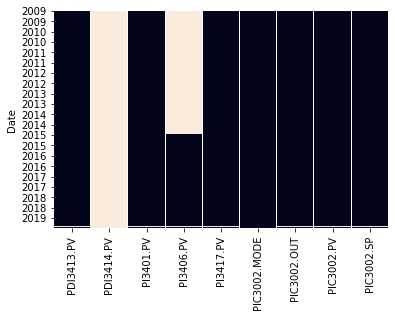

In [22]:
tempo = time.time()
sns.heatmap(df_ano_numerico.isnull(), cbar = False)

Como dito anteriormente, a tag 'PDI3414.PV' está totalmente vazia, uma vez que todos os seus valores são '??????????'.

In [23]:
time.time() - tempo

83.80552411079407

#### 5.4. Análises de qualidade

In [24]:
qualidade(df)

PDI3413.PV_quality
Qtd good: 5311952       Qtd bad: 205539       Good Percent: 96.27 

PDI3414.PV_quality
Qtd good: 0       Qtd bad: 5517491       Good Percent: 0.00 

PI3401.PV_quality
Qtd good: 5466696       Qtd bad: 50795       Good Percent: 99.08 

PI3406.PV_quality
Qtd good: 2341395       Qtd bad: 30050       Good Percent: 98.73 

PI3417.PV_quality
Qtd good: 5462520       Qtd bad: 54971       Good Percent: 99.00 

PIC3002.MODE_quality
Qtd good: 5203706       Qtd bad: 313785       Good Percent: 94.31 

PIC3002.OUT_quality
Qtd good: 5467632       Qtd bad: 49859       Good Percent: 99.10 

PIC3002.PV_quality
Qtd good: 5467587       Qtd bad: 49904       Good Percent: 99.10 

PIC3002.SP_quality
Qtd good: 5467672       Qtd bad: 49819       Good Percent: 99.10 



Como todos os valores de 'PDI3414.PV' são '??????????', todos eles foram classificados como 'Bad'.

### 6. Vibração

#### 6.1. Lendo tags

In [26]:
df = read_tags(vibracao, path(''))
df.to_csv(path_3('df_vibracao.csv.gz'), compression = 'gzip')

Processando TAG: XA3201.PV
Processando TAG: XA3401.PV
Processando TAG: XI3203.PV
Processando TAG: XI3204.PV
Processando TAG: XI3205.PV
Processando TAG: XI3206.PV
Processando TAG: XI3403.PV
Processando TAG: XI3404.PV
Processando TAG: XI3405.PV
Processando TAG: XI3406.PV
Concatenando...
Feito!


#### 6.2. Análises estatísticas

In [26]:
estatisticas(df[df.columns[~df.columns.str.contains('_quality')]])

,mean,min,max,percentNan
XA3401.PV,NaN,NaN,NaN,100.000000
XI3403.PV,4.413410,-0.4,19.866,57.443628
XI3404.PV,5.201737,-0.4,19.871,57.443628
XI3405.PV,1.775360,-0.4,20.400,57.443628
XI3406.PV,4.293753,-0.4,18.697,57.443628


A tag 'XA3401.PV' está vazia, uma vez que todos os seus valores são 'ALARME'.

#### 6.3. Anos das tags

In [27]:
# criando um dataframe novo cujo index são os anos
df_ano = df.copy()
df_ano.index = df_ano.index.year

In [28]:
# removendo as colunas de qualidade
df_ano_numerico = df_ano[df_ano.columns[~df_ano.columns.str.contains('_quality')]]

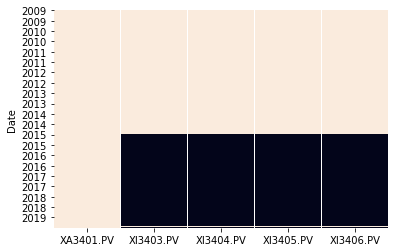

In [29]:
tempo = time.time()
sns.heatmap(df_ano_numerico.isnull(), cbar = False)

In [30]:
time.time() - tempo

57.667393922805786

#### 6.4. Análises de qualidade

In [31]:
qualidade(df)

XA3401.PV_quality
Qtd good: 5257868       Qtd bad: 259623       Good Percent: 95.29 

XI3403.PV_quality
Qtd good: 2342629       Qtd bad: 28816       Good Percent: 98.78 

XI3404.PV_quality
Qtd good: 2342629       Qtd bad: 28816       Good Percent: 98.78 

XI3405.PV_quality
Qtd good: 2342629       Qtd bad: 28816       Good Percent: 98.78 

XI3406.PV_quality
Qtd good: 2342629       Qtd bad: 28816       Good Percent: 98.78 



### 7. Vazão

#### 7.1. Lendo tags

In [13]:
df = read_tags(vazao, path(''))
df.to_csv(path_3('df_vazao.csv.gz'), compression = 'gzip')

Processando TAG: FI2401V.PV
Processando TAG: FI2601V.PV
Processando TAG: FI3202.PV


c:\users\jean.tome\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Processando TAG: FI3402.PV
Processando TAG: FIC2601.MODE
Processando TAG: FIC2601.OUT
Processando TAG: FIC2601.PV
Processando TAG: FIC2601.SP
Processando TAG: FIC4301.LR
Processando TAG: FIC4301.MODE
Processando TAG: FIC4301.OUT
Processando TAG: FIC4301.PV
Processando TAG: FIC4301.SP
Concatenando...
Feito!


#### 7.2. Análises estatísticas

In [14]:
estatisticas(df[df.columns[~df.columns.str.contains('_quality')]])

,mean,min,max,percentNan
FI2401V.PV,15.496006,-0.3,510.000,42.640560
FI2601V.PV,524.696666,-0.6,999.999,94.123129
FI3202.PV,9.851332,0.0,25.392,1.675322
FI3402.PV,8.647621,0.0,25.413,1.675322
FIC2601.MODE,1.151987,0.0,5.000,1.256510
FIC2601.OUT,22.912759,0.0,100.000,1.675322
FIC2601.PV,8.458121,-2.8,14.337,1.675322
FIC2601.SP,8.224742,0.0,14.000,1.675322
FIC4301.LR,0.000452,0.0,1.000,48.180012
FIC4301.MODE,0.009677,0.0,1.000,48.180012


#### 7.3. Anos das tags

In [15]:
# criando um dataframe novo cujo index são os anos
df_ano = df.copy()
df_ano.index = df_ano.index.year

In [16]:
# removendo as colunas de qualidade
df_ano_numerico = df_ano[df_ano.columns[~df_ano.columns.str.contains('_quality')]]

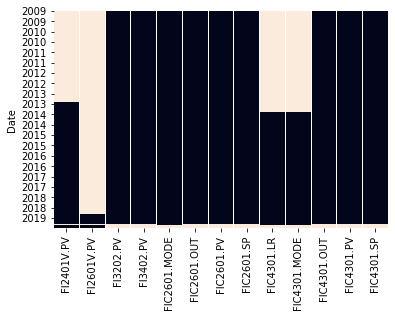

In [17]:
tempo = time.time()
sns.heatmap(df_ano_numerico.isnull(), cbar = False)

In [18]:
time.time() - tempo

100.05065202713013

#### 7.4. Análises de qualidade

In [19]:
qualidade(df)

FI2401V.PV_quality
Qtd good: 3035884       Qtd bad: 193328       Good Percent: 94.01 

FI2601V.PV_quality
Qtd good: 318178       Qtd bad: 34279       Good Percent: 90.27 

FI3202.PV_quality
Qtd good: 5467693       Qtd bad: 49798       Good Percent: 99.10 

FI3402.PV_quality
Qtd good: 5422931       Qtd bad: 94560       Good Percent: 98.29 

FIC2601.MODE_quality
Qtd good: 5317062       Qtd bad: 200429       Good Percent: 96.37 

FIC2601.OUT_quality
Qtd good: 5458193       Qtd bad: 59298       Good Percent: 98.93 

FIC2601.PV_quality
Qtd good: 5458099       Qtd bad: 59392       Good Percent: 98.92 

FIC2601.SP_quality
Qtd good: 5458193       Qtd bad: 59298       Good Percent: 98.93 

FIC4301.LR_quality
Qtd good: 2884357       Qtd bad: 11189       Good Percent: 99.61 

FIC4301.MODE_quality
Qtd good: 2884357       Qtd bad: 11189       Good Percent: 99.61 

FIC4301.OUT_quality
Qtd good: 5458127       Qtd bad: 59364       Good Percent: 98.92 

FIC4301.PV_quality
Qtd good: 5447054       Qtd ba

### 8. Fração molar dos gases

#### 8.1. Lendo tags

In [28]:
df = read_tags(gas, path(''))
df.to_csv(path_3('df_gas.csv.gz'), compression = 'gzip')

Processando TAG: AI23121.PV
Processando TAG: AI23131.PV
Processando TAG: AI23141.PV
Processando TAG: AI23151.PV
Processando TAG: AI23161.PV
Processando TAG: AI23171.PV
Processando TAG: AI23181.PV
Processando TAG: AI23191.PV
Processando TAG: AI23211.PV
Processando TAG: AI23212.PV
Processando TAG: AI23421.PV
Processando TAG: AI23422.PV
Processando TAG: AI23431.PV
Processando TAG: AI23432.PV
Processando TAG: AI23441.PV
Processando TAG: AI23442.PV
Processando TAG: AI23451.PV
Processando TAG: AI23452.PV
Processando TAG: AI23461.PV
Processando TAG: AI23462.PV
Processando TAG: AI23471.PV
Processando TAG: AI23472.PV
Processando TAG: AI23481.PV
Processando TAG: AI23482.PV
Processando TAG: AI23491.PV
Processando TAG: AI23492.PV
Processando TAG: AI25121.PV
Processando TAG: AI25131.PV
Processando TAG: AI25141.PV
Processando TAG: AI25151.PV
Processando TAG: AI25161.PV
Processando TAG: AI25171.PV
Processando TAG: AI25181.PV
Processando TAG: AI25191.PV
Processando TAG: AI25211.PV
Concatenando...
Feit

#### 8.2. Análises estatísticas

In [12]:
estatisticas(df[df.columns[~df.columns.str.contains('_quality')]])

,mean,min,max,percentNan
AI23212.PV,7.317609,0.000,50.000,0.860681
AI23422.PV,27.722772,0.000,65.625,0.424142
AI23432.PV,9.944734,0.000,36.758,0.424160
AI23442.PV,0.058632,0.000,10.000,0.424160
AI23452.PV,35.623032,0.000,100.000,0.424160
AI23462.PV,7.563998,0.000,35.000,0.424160
AI23472.PV,0.492110,0.000,10.000,0.424160
AI23482.PV,3.990861,0.000,20.000,0.424142
AI23492.PV,0.247754,0.000,20.000,0.424142
AI25121.PV,25.587503,0.000,70.000,0.424142


#### 8.3. Anos das tags

In [13]:
# criando um dataframe novo cujo index são os anos
df_ano = df.copy()
df_ano.index = df_ano.index.year

In [14]:
# removendo as colunas de qualidade
df_ano_numerico = df_ano[df_ano.columns[~df_ano.columns.str.contains('_quality')]]

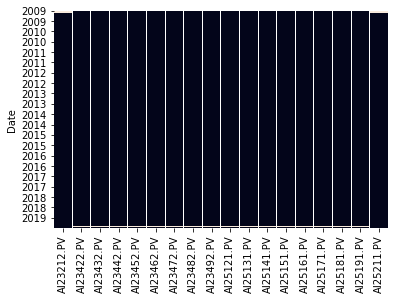

In [15]:
tempo = time.time()
sns.heatmap(df_ano_numerico.isnull(), cbar = False)

In [16]:
time.time() - tempo

195.11486983299255

#### 8.4. Análises de qualidade

In [17]:
qualidade(df)

AI23212.PV_quality
Qtd good: 5397541       Qtd bad: 119950       Good Percent: 97.83 

AI23422.PV_quality
Qtd good: 5464124       Qtd bad: 53367       Good Percent: 99.03 

AI23432.PV_quality
Qtd good: 5462934       Qtd bad: 54557       Good Percent: 99.01 

AI23442.PV_quality
Qtd good: 5462942       Qtd bad: 54549       Good Percent: 99.01 

AI23452.PV_quality
Qtd good: 5462934       Qtd bad: 54557       Good Percent: 99.01 

AI23462.PV_quality
Qtd good: 5462933       Qtd bad: 54558       Good Percent: 99.01 

AI23472.PV_quality
Qtd good: 5462950       Qtd bad: 54541       Good Percent: 99.01 

AI23482.PV_quality
Qtd good: 5453764       Qtd bad: 63727       Good Percent: 98.85 

AI23492.PV_quality
Qtd good: 5453764       Qtd bad: 63727       Good Percent: 98.85 

AI25121.PV_quality
Qtd good: 5464113       Qtd bad: 53378       Good Percent: 99.03 

AI25131.PV_quality
Qtd good: 5462929       Qtd bad: 54562       Good Percent: 99.01 

AI25141.PV_quality
Qtd good: 5462929       Qtd bad: 5

### 9. Outras

#### 9.1. Lendo tags

In [29]:
df = read_tags(outras, path(''))

Processando TAG: EcompC301A.PV
Processando TAG: EcompC302A.PV
Processando TAG: EpolC301A-1.PV
Processando TAG: EpolC301A-2.PV
Processando TAG: EpolC301A.PV
Processando TAG: EpolC302A-1.PV
Processando TAG: EpolC302A-2.PV
Processando TAG: EpolC302A.PV
Processando TAG: EvolC301A-1.PV
Processando TAG: EvolC301A-2.PV
Processando TAG: EvolC301A.PV
Processando TAG: EvolC302A-1.PV
Processando TAG: EvolC302A-2.PV
Processando TAG: EvolC302A.PV
Processando TAG: HeadC301A-1.PV
Processando TAG: HeadC301A-2.PV
Processando TAG: HeadC301A.PV
Processando TAG: HeadC302A-1.PV
Processando TAG: HeadC302A-2.PV
Processando TAG: HeadC302A.PV
Processando TAG: JI3201.PV
Processando TAG: JI3401.PV
Concatenando...
Feito!


In [30]:
df.to_csv(path_3('df_outras.csv.gz'), compression = 'gzip')

#### 9.2. Análises estatísticas

In [19]:
estatisticas(df[df.columns[~df.columns.str.contains('_quality')]])

,mean,min,max,percentNan
EcompC302A.PV,0.385641,-2.876070e+02,5.781150e+02,68.686166
EpolC302A-1.PV,7765.859070,-2.045700e+06,2.826330e+06,49.373166
EpolC302A-2.PV,9085.360153,-2.105887e+07,1.380063e+07,63.097049
EpolC302A.PV,4870.796340,-1.052934e+07,6.900776e+06,62.938988
EvolC302A-1.PV,0.475700,-1.706995e+03,1.209096e+04,2.574757
EvolC302A-2.PV,0.469135,-5.047424e+04,7.713598e+03,3.192121
EvolC302A.PV,0.470871,-2.523668e+04,6.045277e+03,3.190291
HeadC302A-1.PV,-51518.291883,-9.957786e+07,9.941415e+04,3.424854
HeadC302A-2.PV,1089.349892,-9.465806e+07,1.202972e+05,3.245769
HeadC302A.PV,-3292.880757,-9.965019e+07,1.097364e+05,4.053708


#### 9.3. Anos das tags

In [11]:
# criando um dataframe novo cujo index são os anos
df_ano = df.copy()
df_ano.index = df_ano.index.year

NameError: name 'df' is not defined

In [21]:
# removendo as colunas de qualidade
df_ano_numerico = df_ano[df_ano.columns[~df_ano.columns.str.contains('_quality')]]

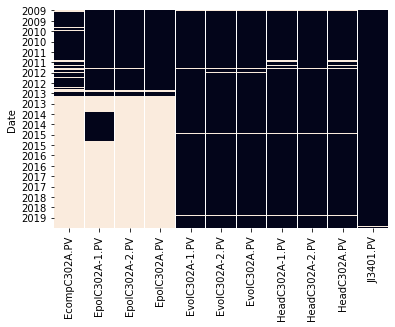

In [22]:
sns.heatmap(df_ano_numerico.isnull(), cbar = False)

#### 9.4. Análises de qualidade

In [23]:
qualidade(df)

EcompC302A.PV_quality
Qtd good: 1719654       Qtd bad: 3797837       Good Percent: 31.17 

EpolC302A-1.PV_quality
Qtd good: 1940117       Qtd bad: 3577374       Good Percent: 35.16 

EpolC302A-2.PV_quality
Qtd good: 1864949       Qtd bad: 3652542       Good Percent: 33.80 

EpolC302A.PV_quality
Qtd good: 1774499       Qtd bad: 3742992       Good Percent: 32.16 

EvolC302A-1.PV_quality
Qtd good: 1978231       Qtd bad: 3539260       Good Percent: 35.85 

EvolC302A-2.PV_quality
Qtd good: 1897868       Qtd bad: 3619623       Good Percent: 34.40 

EvolC302A.PV_quality
Qtd good: 1877131       Qtd bad: 3640360       Good Percent: 34.02 

HeadC302A-1.PV_quality
Qtd good: 2001414       Qtd bad: 3516077       Good Percent: 36.27 

HeadC302A-2.PV_quality
Qtd good: 1897981       Qtd bad: 3619510       Good Percent: 34.40 

HeadC302A.PV_quality
Qtd good: 1876789       Qtd bad: 3640702       Good Percent: 34.02 

JI3401.PV_quality
Qtd good: 5462089       Qtd bad: 55402       Good Percent: 99.00 

